# Python Tutorials

### Data visualization

Solvertank Digital Science   
[http://www.solvertank.com](http://www.solvertank.com)   
<img src='cube.gif' align='left' width='50' />

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas import ExcelFile
df = pd.read_excel('datavis.xlsx', sheet_name='datavis')

In [ ]:
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

In [3]:
df.head(5)

,status,bmi,bp,sex,category,region
0,-0.107226,NaN,-0.040099,M,White,4
1,NaN,-0.055785,0.025315,F,Blue,3
2,0.012648,0.000261,-0.011409,F,Silver,5
3,-0.052738,-0.018062,0.080401,F,NaN,4
4,-0.009147,0.001339,-0.002228,F,Silver,1


In [4]:
# list numeric columns
for column in df.select_dtypes(exclude=['object']).columns:
    print(column)

status
bmi
bp
region


In [5]:
# list categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(column)

sex
category


## Basic descriptive

In [6]:
df.shape #(rows,columns)

(442, 6)

In [6]:
df['bp'].mean()

1.2965684333115339e-16

In [7]:
df['bp'].std()

0.04761904761904799

In [8]:
df['bp'].var()

0.0022675736961451603

In [9]:
df['bp'].count()

442

In [10]:
df['bp'].sum()

5.705158567792523e-14

In [11]:
df['bp'].max()

0.132044217194516

In [12]:
df['bp'].min()

-0.112399602060758

In [13]:
df['bp'].median()

-0.00567061055493425

## Count and describe

In [14]:
df['sex'].value_counts().to_frame()

,sex
M,225
F,192


In [15]:
# count
df.groupby(['sex']).agg(['count'])

,status,bmi,bp,category,region
,count,count,count,count,count
sex,,,,,
F,175,164,192,129,192
M,214,184,225,144,225


In [16]:
df.groupby('sex').size()
df.groupby('sex').mean()

,status,bmi,bp,region
sex,,,,
F,0.006317,0.007201,0.012572,2.968750
M,-0.006414,-0.001807,-0.009924,3.084444


In [17]:
# group and count all columns
for column in df.columns:
    TB = df.groupby(column).size().to_frame(name = 'amount').reset_index()
    print("")
    print(TB)


      status  amount
0  -0.107226       2
1  -0.103593       3
2  -0.099961       1
3  -0.096328       4
4  -0.092695       4
5  -0.089063       3
6  -0.085430       5
7  -0.081798       2
8  -0.078165       2
9  -0.074533       8
10 -0.070900       5
11 -0.067268       3
12 -0.063635       4
13 -0.060003       7
14 -0.056370       6
15 -0.052738      14
16 -0.049105       7
17 -0.045472       8
18 -0.041840      10
19 -0.038207       6
20 -0.034575       6
21 -0.030942       5
22 -0.027310      13
23 -0.023677      10
24 -0.020045       6
25 -0.016412       7
26 -0.012780       4
27 -0.009147       9
28 -0.005515      11
29 -0.001882      14
30  0.001751      12
31  0.005383      13
32  0.009016      15
33  0.012648      12
34  0.016281      18
35  0.019913      11
36  0.023546      12
37  0.027178       9
38  0.030811      11
39  0.034443       6
40  0.038076       9
41  0.041708      15
42  0.045341      12
43  0.048974      11
44  0.052606       3
45  0.056239       5
46  0.059871

In [18]:
# describe
df.describe()

,status,bmi,bp,region
count,413.000000,367.000000,4.420000e+02,442.000000
mean,0.000071,0.001812,1.296568e-16,3.015837
std,0.047463,0.047748,4.761905e-02,1.430863
min,-0.107226,-0.090275,-1.123996e-01,1.000000
25%,-0.038207,-0.033151,-3.665645e-02,2.000000
50%,0.005383,-0.005128,-5.670611e-03,3.000000
75%,0.038076,0.034212,3.564384e-02,4.000000
max,0.110727,0.170555,1.320442e-01,5.000000


## Inspect columns

In [1]:
# describe table columns
def df_describe(dff):
    ret = []
    for column in dff.columns:
        ret.append([column, dff[column].size,  dff[column].isnull().sum(), dff[column].drop_duplicates().count()])
    ret = pd.DataFrame(data=ret, columns=['column','rows','nulls','distinct'])
    return ret

In [35]:
df_describe(df)

-------------------------------------------------------------
COLUMN                           ROWS       NULLS    DISTINCT
-------------------------------------------------------------
status                            442          29          58
bmi                               442          75         152
bp                                442           0         100
sex                               442          25           2
category                          442         153           5
region                            442           0           5


In [36]:
def df_column_count(df, column):
    dff = df[column].value_counts().to_frame()
    dff = dff[column].value_counts().to_frame()
    dff['percent'] = dff[column]/dff[column].sum()
    return dff

In [37]:
df_column_count(df, 'status')

,status,percent
6,8,0.137931
4,5,0.086207
2,5,0.086207
1,5,0.086207
12,4,0.068966
11,4,0.068966
7,4,0.068966
5,4,0.068966
3,4,0.068966
13,3,0.051724


In [44]:
# count values by label
def df_column_values(df, column, order_by_amount):
    dff = df.groupby(column).size().to_frame(name='amount').reset_index()
    if order_by_amount == 1:
        dff = dff.sort_values(by=['amount'], ascending=False)
    else:
        dff = dff.sort_values(by=[column], ascending=True)
    dff['percent'] = dff['amount']/df[column].count()
    return dff

In [45]:
df_column_values(df, 'region', 0)

,region,amount
0,1,89
1,2,87
2,3,88
3,4,84
4,5,94


In [1]:
# count values by label grouped
def df_column_values_grouped(df, column, order_by_amount):
    dff = df.groupby(column).size().to_frame(name='count').reset_index()
    dff = dff['count'].to_frame()
    dff = dff.groupby('count').size().to_frame(name='amount').reset_index()
    if order_by_amount == 1:
        dff = dff.sort_values(by=['amount'], ascending=False)
    else:
        dff = dff.sort_values(by=['count'], ascending=True)
    dff['percent'] = dff['amount']/dff['amount'].sum()
    return dff

## Histogram

In [ ]:
# mean, max, min and histogram
def df_column_dispersion(df, column):
    print(df[column].describe())
    print(df[column].plot.hist(bins=50, alpha=0.8))

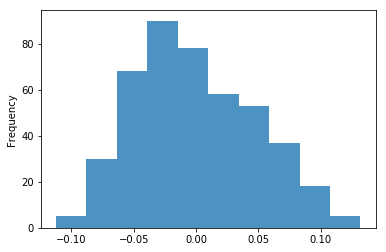

In [20]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
hist = df['bp'].plot.hist(bins=10, alpha=0.8)
#try changing bins and alpha

In [21]:
df.groupby(pd.cut(df['bp'], 10)).size()

bp
(-0.113, -0.088]       5
(-0.088, -0.0635]     30
(-0.0635, -0.0391]    68
(-0.0391, -0.0146]    90
(-0.0146, 0.00982]    78
(0.00982, 0.0343]     58
(0.0343, 0.0587]      53
(0.0587, 0.0832]      37
(0.0832, 0.108]       18
(0.108, 0.132]         5
dtype: int64

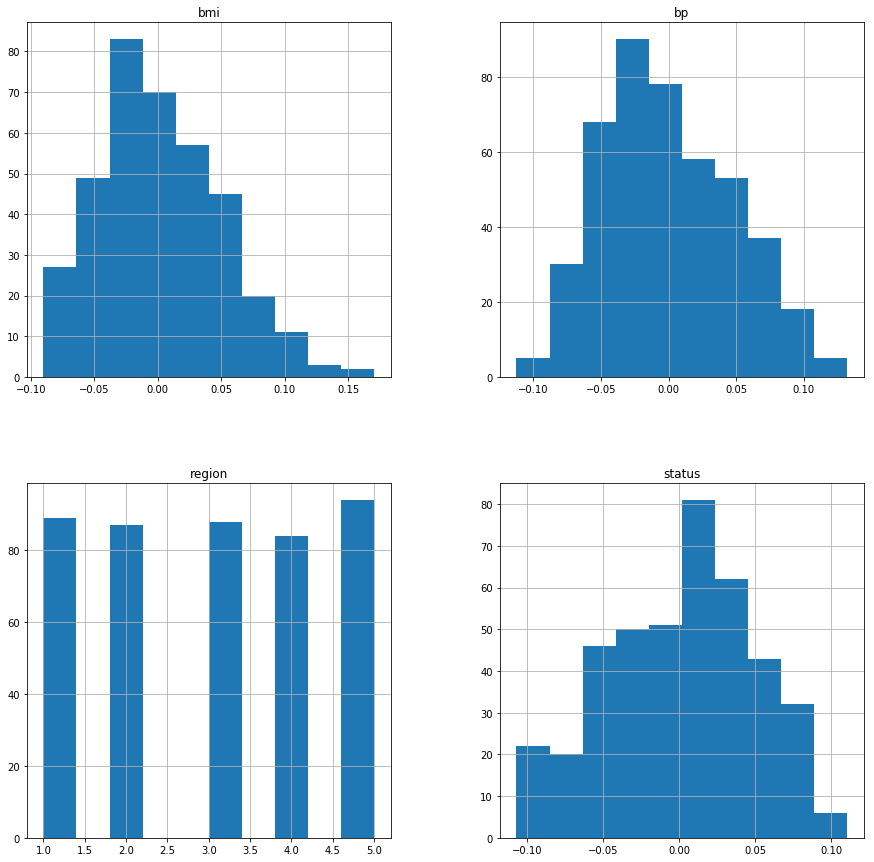

In [22]:
hist = df.hist(bins=10, figsize=(15, 15))

## Correlation

In [23]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
df.corr()

,status,bmi,bp,region
status,1.000000,0.140717,0.334580,-0.034636
bmi,0.140717,1.000000,0.400588,-0.054701
bp,0.334580,0.400588,1.000000,0.006318
region,-0.034636,-0.054701,0.006318,1.000000


In [24]:
df.corrwith(df['status']).sort_values()

region   -0.034636
bmi       0.140717
bp        0.334580
status    1.000000
dtype: float64

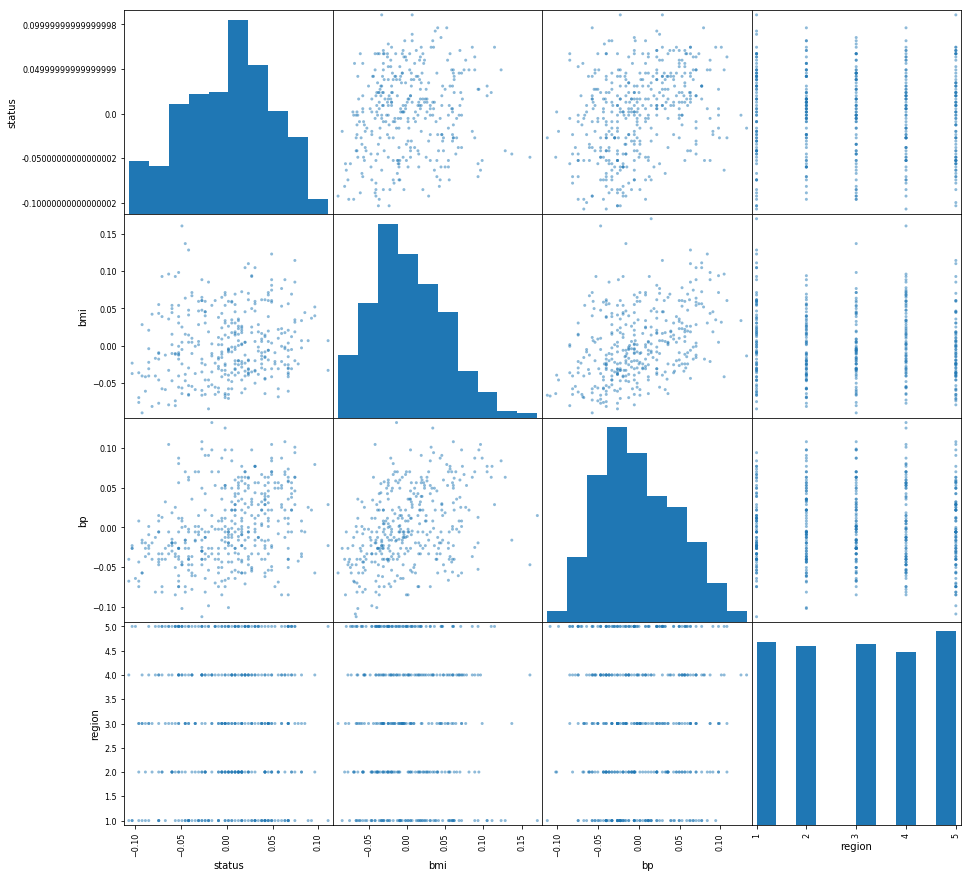

In [25]:
# scatter matrix
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

## Crosstab

In [26]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html
pd.crosstab(df['sex'],df['category'])

category,Blue,Gold,Platinum,Silver,White
sex,,,,,
F,27,39,12,40,11
M,35,24,10,55,20


In [27]:
# total percentage
pd.crosstab(df['sex'],df['category'], normalize='index')

category,Blue,Gold,Platinum,Silver,White
sex,,,,,
F,0.209302,0.302326,0.093023,0.310078,0.085271
M,0.243056,0.166667,0.069444,0.381944,0.138889


In [28]:
# percentage by columns
pd.crosstab(df['sex'],df['category'], normalize='columns')

category,Blue,Gold,Platinum,Silver,White
sex,,,,,
F,0.435484,0.619048,0.545455,0.421053,0.354839
M,0.564516,0.380952,0.454545,0.578947,0.645161


In [29]:
pd.crosstab(df['sex'],df['category'], margins=True)
# margins = total lines and columns

category,Blue,Gold,Platinum,Silver,White,All
sex,,,,,,
F,27,39,12,40,11,129
M,35,24,10,55,20,144
All,62,63,22,95,31,273


In [30]:
pd.crosstab(df['sex'],df['category'],df['bmi'], aggfunc=sum)

category,Blue,Gold,Platinum,Silver,White
sex,,,,,
F,0.264676,0.649126,-0.064215,0.265651,-0.177646
M,0.279992,0.000124,0.281502,-0.292236,-0.386254


In [31]:
pd.crosstab(df['sex'],df['category'],df['bmi'], aggfunc=sum, normalize=True)
# normalize = divide all values by the sum of values (percentage)

category,Blue,Gold,Platinum,Silver,White
sex,,,,,
F,0.322493,0.790923,-0.078243,0.323681,-0.216452
M,0.341154,0.000152,0.342994,-0.356073,-0.470629


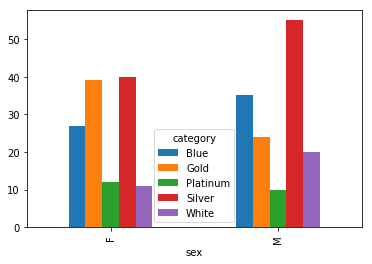

In [32]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
chart = pd.crosstab(df['sex'],df['category']).plot(kind='bar')

## Pivot table

In [33]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
pd.pivot_table(df, 
    index=['sex'], #row
    columns=['category'], #columns
    values=['bmi'],
    aggfunc=[len,np.mean],
    fill_value=0 #Value to replace missing values with
    )


len                                 mean                      \
          bmi                                  bmi                       
category Blue Gold Platinum Silver White      Blue      Gold  Platinum   
sex                                                                      
F          27   39       12     40    11  0.011508  0.021638 -0.006422   
M          35   24       10     55    20  0.010000  0.000007  0.031278   

                              
                              
category    Silver     White  
sex                           
F         0.007590 -0.019738  
M        -0.005964 -0.025750